In [ ]:
#드라이브 연결
import os, sys
from google.colab import drive
drive.mount('/gdrive')
os.chdir('/gdrive/My Drive/유튜브댓글 프로젝트')

Mounted at /gdrive


In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4MB 1.9MB/s 
     |████████████████████████████████| 92kB 12.3MB/s 
     |████████████████████████████████| 460kB 47.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
import pandas as pd
import konlpy.tag
import re
from collections import Counter
import numpy as np

In [ ]:
df = pd.read_csv('진짜최종댓글.csv')

## 1. Labeling

In [ ]:
#감성어사전 불러오기
pos = pd.read_table('감성어사전_positive.csv')
neg = pd.read_table('감성어사전_negative.csv')

In [ ]:
df['score'] = 0
df['score_label'] = 0
for i in range(1,len(df['댓글'])):
  sentence = df['댓글'][i]
  val = 0
  for j in range(len(pos)):
    if pos['긍정'][j] in sentence:
      val += 1
  for k in range(len(neg)):
    if neg['부정'][k] in sentence:
      val -= 1

  df['score'][i] = val

  if val > 0:
    df['score_label'][i] = 1 # 긍정
  elif val < 0:
    df['score_label'][i] = -1 # 부정
  else:
    df['score_label'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: S

In [ ]:
df

,댓글,score,score_label
0,자막은 설정에서 활성화 해주세요 안녕하세요 복희예요 요즘 디저트 찹쌀떡 요청이 많아...,0,0
1,언니 살빠졌죠,1,1
2,맞아여 찹쌀떡 쫀득쫀득 먹고파지네요,3,1
3,양평해장국먹방해주세용 제가 진짜 좋아하는거거든요,6,1
4,설리 닮으신것 같은데 예뻐요,2,1
...,...,...,...
58649,맛잇는 음식이네요 적극 구독누릅니다 유튜버 팍민돌 인사 드립니다,2,1
58650,지랄,-1,-1
58651,복희야 좀 보고 배워랔,0,0
58652,아직도 보러옴 근데 보니까 수율이 좀 안좋았네 지금보니 수율,3,1


+) 레이블링 데이터 훑어보기

In [ ]:
df[df['score_label']==1].head(15)

,댓글,score,score_label
1,언니 살빠졌죠,1,1
2,맞아여 찹쌀떡 쫀득쫀득 먹고파지네요,3,1
3,양평해장국먹방해주세용 제가 진짜 좋아하는거거든요,6,1
4,설리 닮으신것 같은데 예뻐요,2,1
5,찹쌀떡 목에 잘 걸립니다 꼭꼭 씹어먹어요 심지어 예전 예능프로 떡 빨리먹...,5,1
7,아메리카노를 못마신다니 뭔가 이것도 귀엽고 치인다,1,1
9,딸기가디건 짱귀 전 앵두가디건 있는데,2,1
11,보키언니 인스타 잇으신가영,2,1
13,몰티져스생크림먹방 보키언니가 하는 거 보고싶어요,8,1
14,와전에 찹쌀떡 한입에 먹다가 목막혀서 숨도 안쉬어졌던 기억이담부턴 저도 청포도랑 먹...,1,1


In [ ]:
df[df['score_label']==-1][1000:1015]

,댓글,score,score_label
5713,편집점,-2,-1
5715,이것도 쿠캣이냐 양심없네 새우장도 그렇고,-1,-1
5716,광고 겁나 많네돈벌려고 아주,-2,-1
5717,그 놈의 요청 누가 했다는겨,-1,-1
5718,광고주가요,-2,-1
5721,아니 쉴드치려는 건 아닌데이 분이 뒷광고 한 것도 잘못이지만 어쨌든 뒷광고 맡긴 업...,-7,-1
5722,이건 제 생각일 수도 있는데 광고를 요청하면 유튜버는 돈을 받는데 뒷광고를 하면 앞...,-1,-1
5723,와 광고라고 샤인머스켓 비싼거 가줘와서입가심 할려고광고아니었으면 샤인머스켓은 커녕 ...,-2,-1
5725,여러분증거영상은,-1,-1
5727,사기꾼이에요,-2,-1


In [ ]:
df[df['score_label']==0][100:115]

,댓글,score,score_label
559,저 떡을 한번에 넣어두 입이 남아여,0,0
567,오 일분전,0,0
569,일어나자마자 들어왔는데 복희라니,0,0
575,찹쌀복희,0,0
576,초록초록 하네요,0,0
585,아니 포도를 누가 저렇게 먹어여 푸하항,0,0
588,얍 출석체크,0,0
590,복떡복떡,0,0
591,대박,0,0
592,꺄,0,0


## 2. 불용어 처리 & 토큰화

In [ ]:
okt = konlpy.tag.Okt()

In [ ]:
#stop=pd.read_csv("불용어.csv", names=['불용어'])
#stopwords = []

#for k in range(len(stop)):
#    word_list = stop['불용어'][k]
#    data = word_list
#    stopwords.append(data)

In [ ]:
# 불용어 제거 함수
#def remove_stopwords(words):
#    result = []
#    for w in words:
#        if w not in stopwords:
#            result.append(w)
#    return result
                
# 한 글자 단어 모두 불용어로 처리! 한 글자 제거 함수
#def remove_onewords(words):
#    result = []
#    for w in words:
#        if len(w) != 1:
#            result.append(w)
#    return result

In [ ]:
df['형태소'] = df['댓글'].apply(lambda x: okt.morphs(x))
#df['형태소'] = df["형태소"].apply(remove_stopwords)
#df['형태소'] = df['형태소'].apply(remove_onewords)

In [ ]:
df

,댓글,score,score_label,형태소
0,자막은 설정에서 활성화 해주세요 안녕하세요 복희예요 요즘 디저트 찹쌀떡 요청이 많아...,0,0,"[자막, 은, 설정, 에서, 활성화, 해주세요, 안녕하세요, 복희, 예요, 요즘, ..."
1,언니 살빠졌죠,1,1,"[언니, 살빠졌죠]"
2,맞아여 찹쌀떡 쫀득쫀득 먹고파지네요,3,1,"[맞아여, 찹쌀떡, 쫀득쫀득, 먹고, 파지네요]"
3,양평해장국먹방해주세용 제가 진짜 좋아하는거거든요,6,1,"[양평, 해장국, 먹방, 해주세용, 제, 가, 진짜, 좋아하는거거든요]"
4,설리 닮으신것 같은데 예뻐요,2,1,"[설리, 닮으신, 것, 같은데, 예뻐요]"
...,...,...,...,...
58649,맛잇는 음식이네요 적극 구독누릅니다 유튜버 팍민돌 인사 드립니다,2,1,"[맛, 잇는, 음식, 이네, 요, 적극, 구독, 누릅니다, 유튜버, 팍민돌, 인사,..."
58650,지랄,-1,-1,[지랄]
58651,복희야 좀 보고 배워랔,0,0,"[복희, 야, 좀, 보고, 배워랔]"
58652,아직도 보러옴 근데 보니까 수율이 좀 안좋았네 지금보니 수율,3,1,"[아직도, 보러, 옴, 근데, 보, 니까, 수, 율, 이, 좀, 안좋았네, 지, 금..."


In [ ]:
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional, Dropout,GRU
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## 3.Train/Test 분리 (+중립/긍정/부정을 나타내는 label 원핫인코딩)

In [ ]:
#  데이터 스플릿(훈련 데이터와 테스트 데이터) by sklearn module
# train:test=7:3

train_x, test_x, train_y, test_y = train_test_split(df['형태소'], df['score_label'], test_size=0.3, random_state=0)

In [ ]:
# Score_label 원핫인코딩
# keras의 to_categorical을 이용해 인자 3만 넣어주면 알아서 원핫인코딩을 해줌
# 중립(0) = [1,0,0]  /   긍정(1) = [0,1,0]   /  부정(-1) = [0,0,1]

train_y = to_categorical(train_y,3)
test_y = to_categorical(test_y,3)

## 4.Word2Vec 임베딩 설정

In [ ]:
from gensim.models.word2vec import Word2Vec

#Word2Vec Embedding (Skip-gram방식 적용, Window size=5, 단어 최소 등장 횟수=5)
w2v = Word2Vec(df['형태소'], sg=1, window=5, min_count=5)
w2v.init_sims(replace=True)

## 5. 정수인코딩

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
# max_words 구하기 위해 전체 토큰 개수보기
tokens = [ t for d in train_x for t in d]
len(tokens)

490903

In [ ]:
train_X=[]
for sentence in train_x:
  train_X.append(sentence)

test_X=[]
for sentence in test_x:
  test_X.append(sentence)

In [ ]:
# 각각 문장단위로 토큰화가 잘되어서 들어가있는지 확인
train_X[:2]

[['대', '대대'],
 ['목',
  '매달',
  '아',
  '달라',
  '는',
  '새끼',
  '어디',
  '갔냐',
  '아무리',
  '잘못',
  '해도',
  '그렇지',
  '사람',
  '목숨',
  '가지',
  '고',
  '장난',
  '치는거아니다',
  '사과',
  '해라']]

In [ ]:
max_words = len(tokens)+1  
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train_x)
train_x = tokenizer.texts_to_sequences(train_X)
test_x = tokenizer.texts_to_sequences(test_x)

In [ ]:
# 인코딩 잘되었는지 확인
train_x[:2]

[[330, 12524],
 [233,
  579,
  24,
  698,
  12,
  368,
  272,
  3395,
  388,
  83,
  286,
  1804,
  20,
  1408,
  539,
  38,
  1056,
  18939,
  93,
  846]]

## 6. Padding   


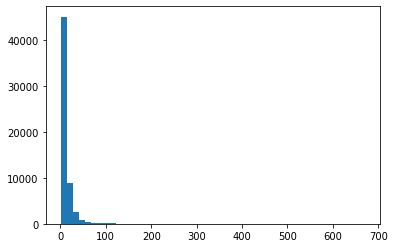

분리된 형태소들 최대길이 :  671
분리된 형태소들 평균길이 :  12.070174242165923


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist([len(sentence) for sentence in df['형태소']], bins=50)
plt.show()

print('분리된 형태소들 최대길이 : ',max(len(l) for l in df['형태소']))
print('분리된 형태소들 평균길이 : ',sum(map(len,df['형태소']))/len(df['댓글']))

# result : 최대 길이와 평균길이가 너무 심하게 차이나서 이것만 보고 판단하기 애매

In [ ]:
#check length
def propotion(max_len, sentences):
  cnt = 0
  for sent in sentences:
    if len(sent) <= max_len:
      cnt += 1
  print(f'전체 문장 중 길이가 {max_len} 이하인 샘플 비율 : {(cnt/len(sentences))*100}')

for MAX in range(0,100,5):
  propotion(MAX, df['형태소'])

# result : 길이가 35이 되면서 비율 증가세가 완만해짐 --> 최대 길이 35으로 정하기

전체 문장 중 길이가 0 이하인 샘플 비율 : 0.0
전체 문장 중 길이가 5 이하인 샘플 비율 : 36.16803628056058
전체 문장 중 길이가 10 이하인 샘플 비율 : 64.44914242847888
전체 문장 중 길이가 15 이하인 샘플 비율 : 78.89998977051863
전체 문장 중 길이가 20 이하인 샘플 비율 : 86.53800252327207
전체 문장 중 길이가 25 이하인 샘플 비율 : 90.77300780850412
전체 문장 중 길이가 30 이하인 샘플 비율 : 93.43267296348075
전체 문장 중 길이가 35 이하인 샘플 비율 : 95.0421113649538
전체 문장 중 길이가 40 이하인 샘플 비율 : 96.08381355065299
전체 문장 중 길이가 45 이하인 샘플 비율 : 96.89023766495039
전체 문장 중 길이가 50 이하인 샘플 비율 : 97.42046578238484
전체 문장 중 길이가 55 이하인 샘플 비율 : 97.85351382684898
전체 문장 중 길이가 60 이하인 샘플 비율 : 98.2217751559996
전체 문장 중 길이가 65 이하인 샘플 비율 : 98.47239744944932
전체 문장 중 길이가 70 이하인 샘플 비율 : 98.68380673099874
전체 문장 중 길이가 75 이하인 샘플 비율 : 98.8628226548914
전체 문장 중 길이가 80 이하인 샘플 비율 : 98.97023220922699
전체 문장 중 길이가 85 이하인 샘플 비율 : 99.09980563985405
전체 문장 중 길이가 90 이하인 샘플 비율 : 99.2123299348723
전체 문장 중 길이가 95 이하인 샘플 비율 : 99.27882156374672


In [ ]:
max_len = 35 # 전체 데이터의 길이를 35으로 맞춘다

train_x = pad_sequences(train_x, maxlen=max_len)
test_x = pad_sequences(test_x, maxlen=max_len)

In [ ]:
train_x

array([[    0,     0,     0, ...,     0,   330, 12524],
       [    0,     0,     0, ..., 18939,    93,   846],
       [  612,  4119,  1409, ...,     5, 12526,    19],
       ...,
       [    0,     0,     0, ...,   107,   356,  3587],
       [    0,     0,     0, ..., 17063,  4934,   396],
       [    0,     0,     0, ...,    14, 47261,   998]], dtype=int32)

## 7. word2vec embedding matrix 구축

In [ ]:
# 위에서 정의한 애들,,
vocab_size = max_words
max_len = 35

In [ ]:
def get_vector(w,model):
    if w in model:
        return model[w]
    else:
        return None

In [ ]:
embedding_vocab = len(tokens)+1
embedding_dim = 100
g_embed_100 = np.zeros((embedding_vocab, embedding_dim))
for idx, word in enumerate(tokens) :
  temp = get_vector(word,w2v)
  if temp is not None:
    g_embed_100[idx] = temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


## 8. modeling

- word2vec이랑 keras 내장 임베딩 비교 : 모델에 적용했을 때 word2vec보다 keras내장 임베딩이 더 우수
- lstm vs bi-lstm vs GRU : bi-lstm과 GRU 비슷하지만 GRU가 시간절약

(1) word2vec + bilstm

In [ ]:
bmodel = Sequential()
bmodel.add(Embedding(vocab_size, 100, input_length=max_len,
                    weights=[g_embed_100],
                    mask_zero=True, trainable=False))
bmodel.add(Bidirectional(LSTM(128, recurrent_dropout=0.2)))
bmodel.add(Dropout(0.2))
bmodel.add(Dense(3,activation='softmax'))

#검증 데이터 손실이 4회 증가하면 학습을 중단하는 조기 종료(EarlyStopping)
#검증 데이터의 정확도가 이전보다 좋아질 경우에만 모델을 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# compile model
bmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = bmodel.fit(train_x, train_y, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

In [ ]:
print('\n 테스트 정확도 : {:.2f}'.format(model.evaluate(btest_x,btest_y)[1]*100))

124/124 [==============================] - 4s 24ms/step - loss: 1.5050 - accuracy: 0.7377

 테스트 정확도 : 73.77


(2) KerasEmbedding+bilstm

In [ ]:
kmodel = Sequential()
kmodel.add(Embedding(max_words,100))
kmodel.add(Bidirectional(LSTM(128, recurrent_dropout=0.2)))
kmodel.add(Dense(3,activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('kmodel.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# compile model
kmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = kmodel.fit(train_x, train_y, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

In [ ]:
loaded_model = load_model('kmodel.h5')
print('\n 테스트 정확도 : {:.2f}'.format(kmodel.evaluate(test_x,test_y)[1]*100))

550/550 [==============================] - 11s 20ms/step - loss: 0.7696 - accuracy: 0.8155

 테스트 정확도 : 81.55


(3) kerasEmbedding+GRU    
** 최종 모형으로 선택!!


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len,
                    weights=[g_embed_100],
                    mask_zero=True, trainable=False))
model.add(GRU(100))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 100)           49090400  
_________________________________________________________________
gru (GRU)                    (None, 100)               60600     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 49,161,403
Trainable params: 71,003
Non-trainable params: 49,090,400
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=15, callbacks=[es, mc], batch_size=40, validation_split=0.1)
model.summary()

Epoch 1/15
924/924 [==============================] - 40s 37ms/step - loss: 0.9681 - accuracy: 0.5516 - val_loss: 0.8606 - val_accuracy: 0.6189
Epoch 2/15
924/924 [==============================] - 31s 34ms/step - loss: 0.8640 - accuracy: 0.6144 - val_loss: 0.8281 - val_accuracy: 0.6325
Epoch 3/15
924/924 [==============================] - 32s 34ms/step - loss: 0.8333 - accuracy: 0.6309 - val_loss: 0.8193 - val_accuracy: 0.6364
Epoch 4/15
924/924 [==============================] - 32s 34ms/step - loss: 0.8153 - accuracy: 0.6378 - val_loss: 0.8037 - val_accuracy: 0.6500
Epoch 5/15
924/924 [==============================] - 32s 35ms/step - loss: 0.7967 - accuracy: 0.6474 - val_loss: 0.7964 - val_accuracy: 0.6498
Epoch 6/15
924/924 [==============================] - 32s 35ms/step - loss: 0.7783 - accuracy: 0.6573 - val_loss: 0.7923 - val_accuracy: 0.6568
Epoch 7/15
924/924 [==============================] - 32s 34ms/step - loss: 0.7621 - accuracy: 0.6684 - val_loss: 0.7733 - val_accuracy:

## 9. Result

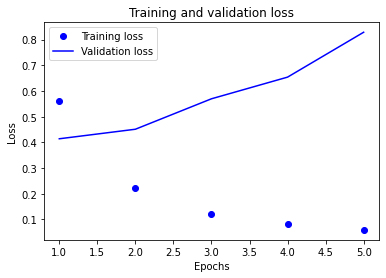

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

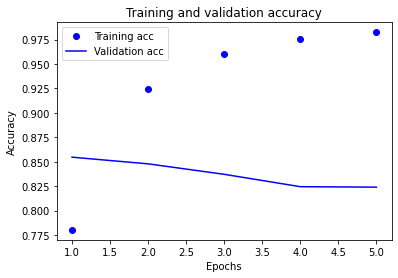

In [ ]:
plt.clf() 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### +) 실제 데이터 예측해보기

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  prediction = model.predict(pad_new)
  score = np.argmax(prediction)
  if score == 1:
    print("이 문장은 긍정입니다.")
  elif score == 2:
    print('이 문장은 부정입니다.')
  else:
    print('이 문장은 중립입니다.')

In [ ]:
sentiment_predict('형 영상볼때마다 구독자수도 보는데 올라올때마다 구독자수가 곰방곰방 느네요... 형 매력때문인가')

이 문장은 긍정입니다.


In [ ]:
sentiment_predict('솔직히 너무 좋은거 같아 질리지를 않아,,')

이 문장은 긍정입니다.


In [ ]:
sentiment_predict('썸넬보고 와 뭐야 존나잘생겼다~ 이러면서 들어왔는데 저에옄 이러는순간 깬다,,,,,,')

이 문장은 긍정입니다.


In [ ]:
sentiment_predict('아니영상은 본인이 찍고 싶으면 찍어두되는데사실 뒷광고 땜에 걸리면 조용히 있거나 채널삭죄하는것이 올바른거임내생각.  아아니다ㅋㅋ 해명은 언죄하셔유')

이 문장은 부정입니다.


In [ ]:
sentiment_predict('장마피해에 기부좀 하세요-- 광고수익으로좀 가증스럽네요')

이 문장은 부정입니다.


In [ ]:
sentiment_predict('상윤쓰인가그놈도광고랑협찬헷갈렷다고순수한척다하드만.... 쉴드러오지던데 개빠는애들도싫고')

이 문장은 부정입니다.


In [ ]:
sentiment_predict('남편이 일하는 회사 홍보해준거다 이렇게 이야기하면 될껄 이리 저리 핑계만되니.. 의혹만 쌓이는거에요')

이 문장은 부정입니다.


In [ ]:
sentiment_predict('써김 약간 초심 안잃을듯한 유튜버랄까요? 초반보다 유명해지고 돈 많이 생겨도 열심히 일 하고 초심 잃지않는 모습만 보여주니 더 호감이 생기는거같아요! 더 흥해라!')

이 문장은 긍정입니다.
